# Lec 6.2

- Go over #3 from Monday (6.1)
- Do #4 as an exercise

- Finding indices of interest with np.where

- Meshgrids

3 . Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [2]:
data = xr.open_dataset('/Users/chha5666/Documents/Teaching/Intro_computing/Data/CESM.003.SST.1980.nc')

# extract variables from the above netcdf file
lat = np.array(data.lat)
#lat
lon = np.array(data.lon)
# monthly sea surface temperature anamoly
sst = np.array(data.SST)

In [3]:
sst_mean = np.mean(sst, axis = 0)

In [4]:
lat.shape

(180,)

In [5]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [6]:
# make a mask using the lat array

trop = 23.4368

(lat> trop) | (lat< (-1*trop))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
# the easiest way to do this is to make a mask array that is the same size as the mean sst array
mask = np.zeros_like(sst_mean)
mask.shape

(180, 360)

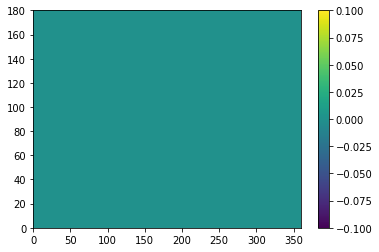

In [8]:
plt.pcolormesh(mask)
plt.colorbar()

In [9]:
# we want every longitude, all 360, to have the same mask we just created
for i in range(360):
    mask[:,i] = (lat> trop) | (lat< (-1*trop))

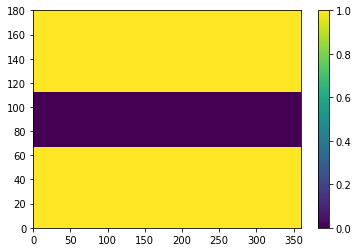

In [10]:
plt.pcolormesh(mask)
plt.colorbar()

In [11]:
# take the mean SST and mask
sst_trop = np.ma.masked_where(mask,sst_mean)


(-23.4368, 24.4368)

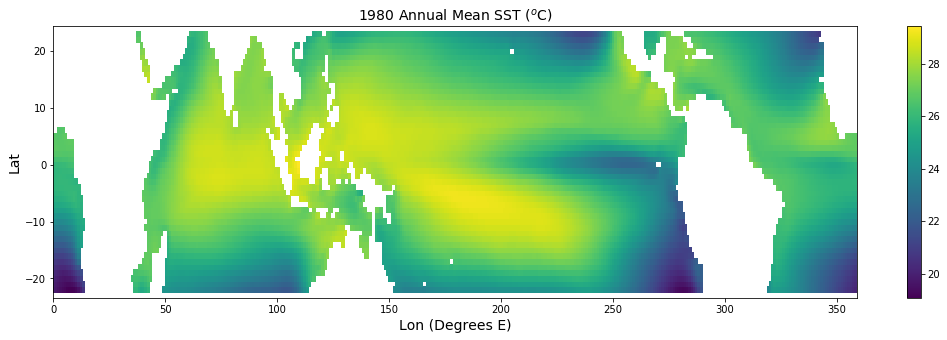

In [12]:
plt.figure(figsize=(18,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)', fontsize = 14)
plt.ylabel('Lat', fontsize = 14)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 14)
plt.ylim([-trop,trop+1])


In [13]:
# if I want to change all of my plots:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# note this method changes tick mark font sizes as well

(-23.4368, 24.4368)

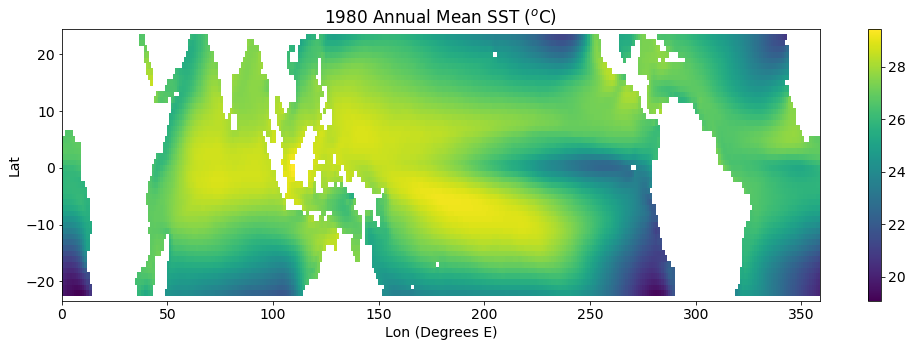

In [14]:
# now I don't have to put in all of the fontsize commands
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')
plt.ylim([-trop,trop+1])

Exercise (#4 from last time): Mask out the tropics and plot again.

In [15]:
(lat< trop) & (lat> (-1*trop))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [18]:
mask2 = np.zeros_like(sst_mean)
# we want every longitude, all 360, to have the same mask we just created
for i in range(360):
    mask2[:,i] = (lat< trop) & (lat> (-1*trop))

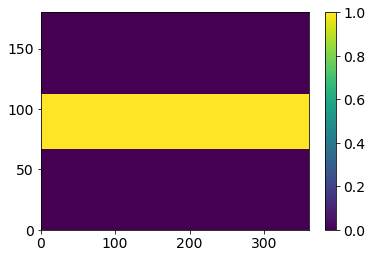

In [19]:
plt.pcolormesh(mask2)
plt.colorbar()

In [21]:
# take the mean SST and mask
sst_etrop = np.ma.masked_where(mask2,sst_mean)

Text(0.5,1,'1980 Annual Mean SST ($^o$C)')

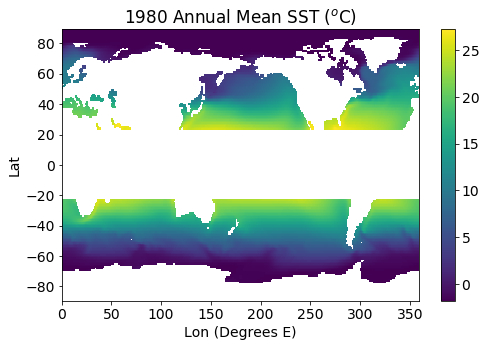

In [23]:
# now I don't have to put in all of the fontsize commands
plt.figure(figsize=(8,5))
plt.pcolormesh(lon,lat,sst_etrop)
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')

## Part 2: Finding data

From #5: Find the grid cell closest to us. Plot the seasonal cycle of SST. 

The latitude of South Padre Island is 26.1118° N, 97.1681° W

In [25]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [26]:
# use np.where to find elements that are greater than a given value
np.where(lat>26.1118)
# these are all the elements that are greater than 26

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]),)

In [27]:
lat[116] # yes this is gerater than 26.1118

26.5

### aside: finding values in a 2D array

In [28]:
# if we had a 2D array it would give us two arrays, one for each dimension
np.where(sst_mean > 20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(array([ 53,  53,  53, ..., 130, 130, 130]),
 array([ 21,  22,  23, ..., 296, 297, 298]))

In [29]:
# we can assign arrays to these indices where the constraint is true
xind, yind = np.where(sst_mean > 20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [30]:
xind

array([ 53,  53,  53, ..., 130, 130, 130])

In [31]:
yind

array([ 21,  22,  23, ..., 296, 297, 298])

In [32]:
sst_mean[53,21] # yes this is greater than 20

20.000553925832111

### back to the main problem

In [33]:
# where is better at nD arrays rather than 1D arrays, where it gives weirdly formatted output
np.where(lat>26.1118)

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]),)

In [34]:
xind= np.where(lat>26.1118)

In [35]:
# what kind of thing is xind?
xind?

In [36]:
xind[0]
# now we have an array

array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [37]:
xind[0][0]

116

In [38]:
lat[xind[0][0]]

26.5

In [39]:
# note lon is 0 to 360 East
# we want  97.1681° W = 360 - 97.1681 E
mylon = 360 - 97.1681
mylon

262.8319

In [40]:
# same thing for lon
np.where(lon > 262.8319)[0][0]

263

In [41]:
sst_mean.shape
# remember this is lat by lon

(180, 360)

In [42]:
sst_mean[116,263]
# what is wrong here?

nan

(20, 40)

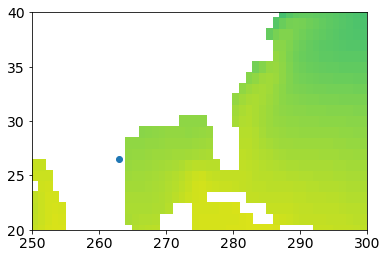

In [43]:
# let's try some investigative plotting
plt.pcolormesh(lon,lat,sst_mean)
plt.scatter(lon[263],lat[116])
plt.xlim(250,300)
plt.ylim(20,40)
#yeah, that's on land

In [44]:
sst_mean[116,264]
# move over one to offshore

24.422648906707764

Exercise: 

1. Make a line plot of the montly temperature at this location
1. Which month is it hottest? How hot is it?
2. Which is it coldest? How cold is it?
3. Now use np.where to find the above values

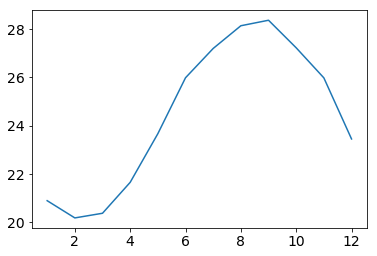

In [46]:
plt.plot(np.arange(1,13), sst[:,116,264])

Hottest in month 9 (September) and coldest in month 2 (Feb)

In [47]:
# feb sst
sst[1,116,264]

20.17115592956543

In [48]:
# sep sst
sst[8,116,264]

28.368648529052734

Use where to find the above values

In [53]:
mymax = sst[:,116,264].max()

In [54]:
mymin = sst[:,116,264].min()

In [56]:
# find with max and where
np.where(sst[:,116,264] == mymax)[0][0]

8

In [57]:
np.where(sst[:,116,264] == mymin)[0][0]

1

## Part 3: Meshes

See https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

Suppose we want to plot a 2D function. When we wanted to plot a 1D function we used an np.arange or np.linspace

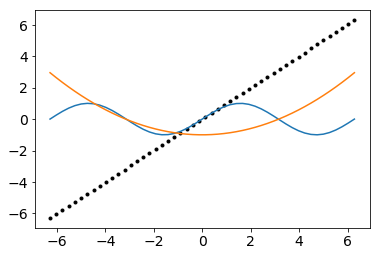

In [72]:
x = np.linspace(-np.pi*2, np.pi*2, 50) # the x values to evaluate a function at

# we can use the x values above to evaluate any function
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x, '.k')
plt.plot(x,y1)
plt.plot(x,y2)

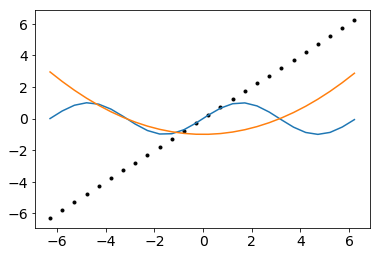

In [74]:
# similarly
#x = np.linspace(-np.pi*2, np.pi*2, 100) # the x values to evaluate a function at
x = np.arange(-np.pi*2, np.pi*2, 0.5) # the x values to evaluate a function at

# we can use the x values above to evaluate any function
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x,'k.')
plt.plot(x,y1)
plt.plot(x,y2)

Exercise: In words, what is different about the arange and linspace x arrays? 

A: arange specifies a number of points, linspace uses increments

Now we want to plot a 2D function, so we need a point x and a point y to evaluate for every location on the 2D grid. 

In [58]:
x = np.linspace(-np.pi*2, np.pi*2, 50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)

Exercise: what are X and Y? Plot them

In [59]:
X.shape

(50, 50)

In [60]:
Y.shape

(50, 50)

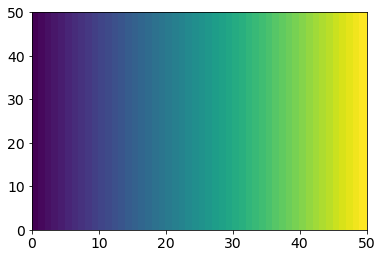

In [61]:
plt.pcolormesh(X)

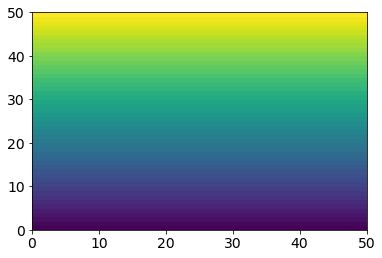

In [62]:
plt.pcolormesh(Y)

X and Y are 2D arrays that expand the 1D arrays so that we can evaluate a function everywhere in space

We can use X and Y to evaluate a function

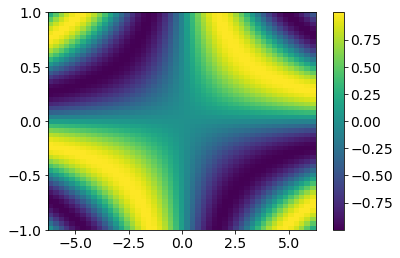

In [80]:
z = np.sin(X*Y)
plt.pcolormesh(x,y,z) 
plt.colorbar()

Note that in the above, x and y were used to plot z. We can also use X and Y

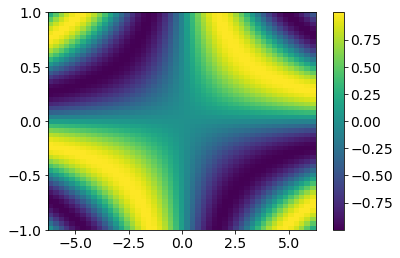

In [81]:
z = np.sin(X*Y)
plt.pcolormesh(X,Y,z) 
plt.colorbar()

Exercise: Could we use x and y to define z above? Why or why not?

In [64]:
# note this works
z2 = np.sin(x*y)

In [81]:
z2.shape

(50,)

The above only gives you a 50 point 1D array. That is, it is not evaluating the sin(xy) function all over space, only at 50 points

Exercise: Do exercises 3 and 4 above using meshgrids instead of for loops

In [65]:
LON,LAT = np.meshgrid(lon,lat)

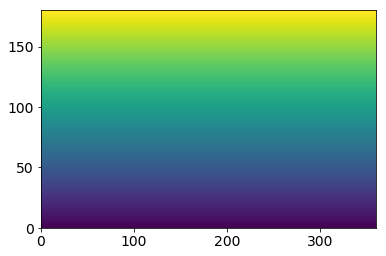

In [82]:
# use the LAT meshgrid array to make the mask. It is already the correct size
plt.pcolormesh(LAT)

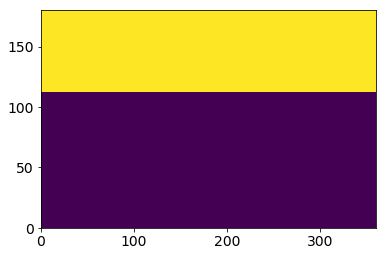

In [72]:
plt.pcolormesh((LAT>23))

In [73]:
mask3 = (LAT > trop) | (LAT <-1*trop)

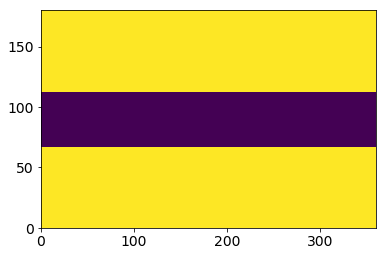

In [74]:
plt.pcolormesh(mask3)

In [77]:
sst3 = np.ma.masked_where(mask3,sst_mean)

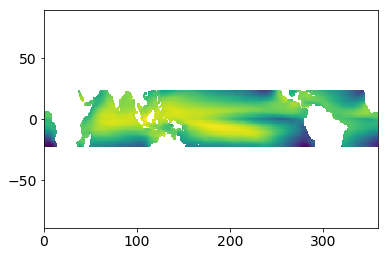

In [78]:
plt.pcolormesh(LON,LAT,sst3)

In [75]:
mask4 = (LAT < trop) & (LAT >-1*trop)

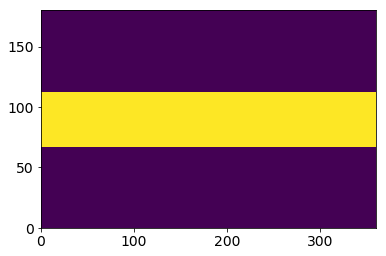

In [76]:
plt.pcolormesh(mask4)

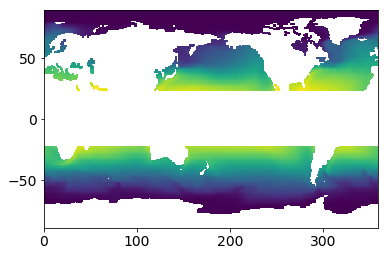

In [79]:
sst4 = np.ma.masked_where(mask4,sst_mean)
plt.pcolormesh(LON,LAT,sst4)